## 1. Load in the fish tether dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/yingliang/Desktop/FishTetherProject/FishTetherExperiment/ProcessedData/processed_AnalysisData.csv')

/var/folders/r_/ypjqpbh136gdzxvkn9cvg1wh0000gn/T/ipykernel_40496/436029662.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/yingliang/Desktop/FishTetherProject/FishTetherExperiment/ProcessedData/processed_AnalysisData.csv')


## 2. Drop unwanted columns
Since the goal of the classifier is to predict fish species without physically catching them, I will exclude the physical measurements of the fish from the model. Instead, I will use the following features to build the classifier:
fishNum, target strength at each frequency, ping date, ping time, and species.

In [2]:
frequency_columns = [col for col in df.columns if col.startswith('F')]
frequency_columns = frequency_columns[3:]

other_columns = ['fishNum', 'species', 'Ping_time', 'dateSample']
frequency_columns.extend(other_columns)

df = df[frequency_columns]
df["pingDateTime"] = pd.to_datetime(df["dateSample"] + " " + df["Ping_time"], errors="coerce")
print(df.head())

         F45      F45.5        F46      F46.5        F47      F47.5  \
0 -48.850989 -47.481644 -45.900477 -44.184644 -42.970845 -41.691276   
1 -47.374837 -47.585660 -47.124362 -45.489171 -43.606820 -41.616682   
2 -47.870826 -49.341342 -49.339863 -47.152783 -44.901575 -42.735101   
3 -44.326289 -45.714510 -47.617086 -48.788610 -48.555806 -46.698281   
4 -41.437463 -42.339934 -43.594854 -44.653928 -45.868339 -46.605502   

         F48      F48.5        F49      F49.5  ...       F258     F258.5  \
0 -40.599349 -39.570164 -38.581552 -37.671468  ... -34.438977 -34.276976   
1 -40.115114 -38.952216 -37.989185 -37.155027  ... -32.662676 -32.770819   
2 -40.998254 -39.533235 -38.270208 -37.192617  ... -35.578946 -35.945827   
3 -44.686905 -42.949347 -41.513695 -40.306633  ... -26.414957 -25.998080   
4 -46.938155 -46.679795 -46.015012 -45.137440  ... -32.225689 -33.095295   

        F259     F259.5       F260  fishNum    species       Ping_time  \
0 -33.769410 -32.877393 -31.754954    LT00

F45             0
F45.5           0
F46             0
F46.5           0
F47             0
               ..
fishNum         0
species         0
Ping_time       0
dateSample      0
pingDateTime    0
Length: 431, dtype: int64


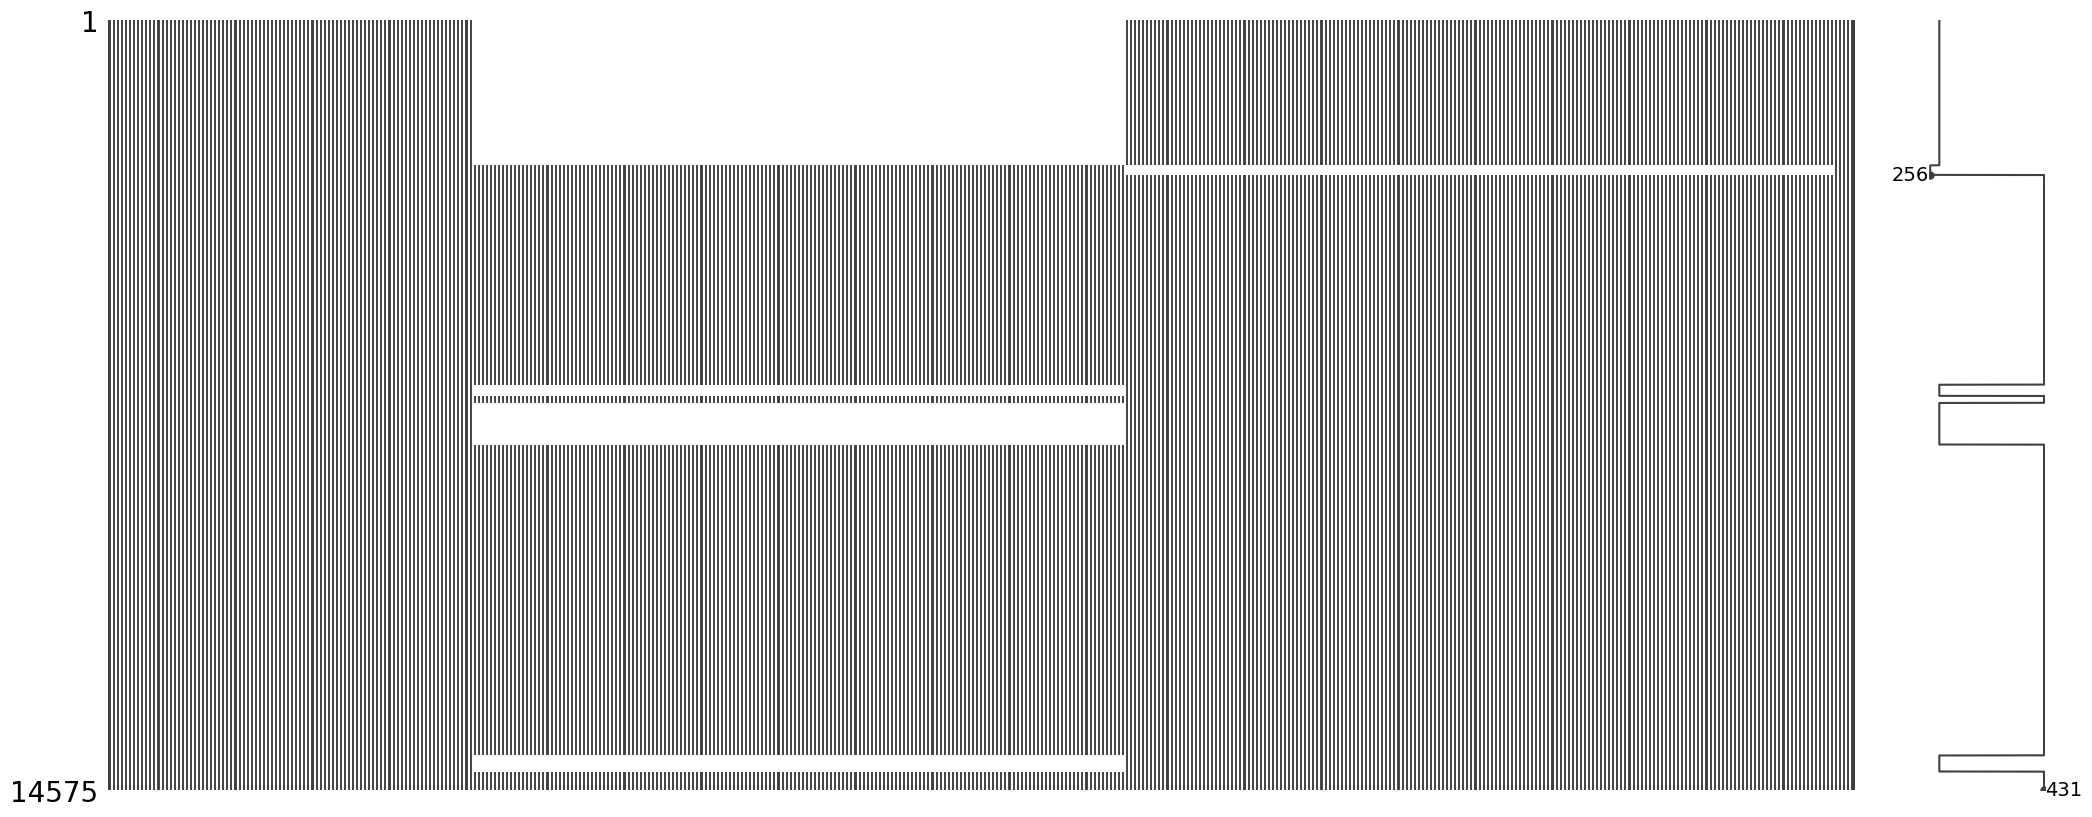

In [3]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
import missingno as msno
msno.matrix(df)
plt.show()

According to my obervation to the dataset: \
LakeTrout: F90 - F170 missing for LT001 to LT007 \
LT008: F173 - F260 missing \
LT20: F90 - F170 missing 

LWF: F90 - F170 missing for LWF001-LWF003, in total there are 10 LWF \
SMB008-SMB010: F90 - F170 missing

In [4]:
# Remove Lake White Fish data since there are not many samples and data missing for LWF001-LWF003
df = df.loc[df['species'] != 'lakeWhitefish']

## 3. EDA 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10290 entries, 0 to 14574
Columns: 431 entries, F45 to pingDateTime
dtypes: datetime64[ns](1), float64(426), object(4)
memory usage: 33.9+ MB
None


### 3.1 Check class distribution

/var/folders/r_/ypjqpbh136gdzxvkn9cvg1wh0000gn/T/ipykernel_40496/232928236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="species", palette="pastel")


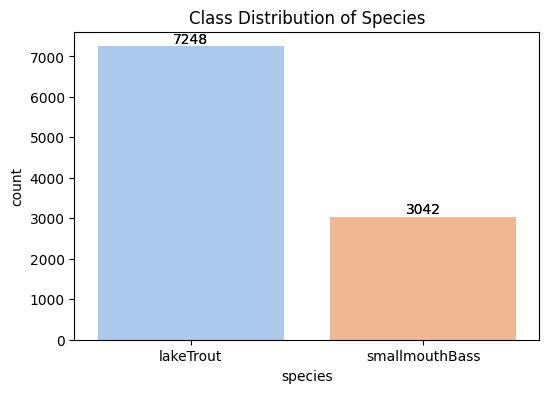

In [6]:
# Count of each species
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="species", palette="pastel")
ax = sns.countplot(data=df, x="species", hue="species", palette="pastel", legend=False)

# Add count labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position
            p.get_height() + 0.5,           # Y position (above the bar)
            int(p.get_height()),            # Label (count value)
            ha="center", va="bottom", fontsize=10)

plt.title("Class Distribution of Species")
plt.show()

As we can see, there are 7248 records of lake trout, and 3042 records of small mouth bass, which means the dataset is not balanced. Thus, we might need to consider balancing techniques later.

### 3.2 Check Missing Values

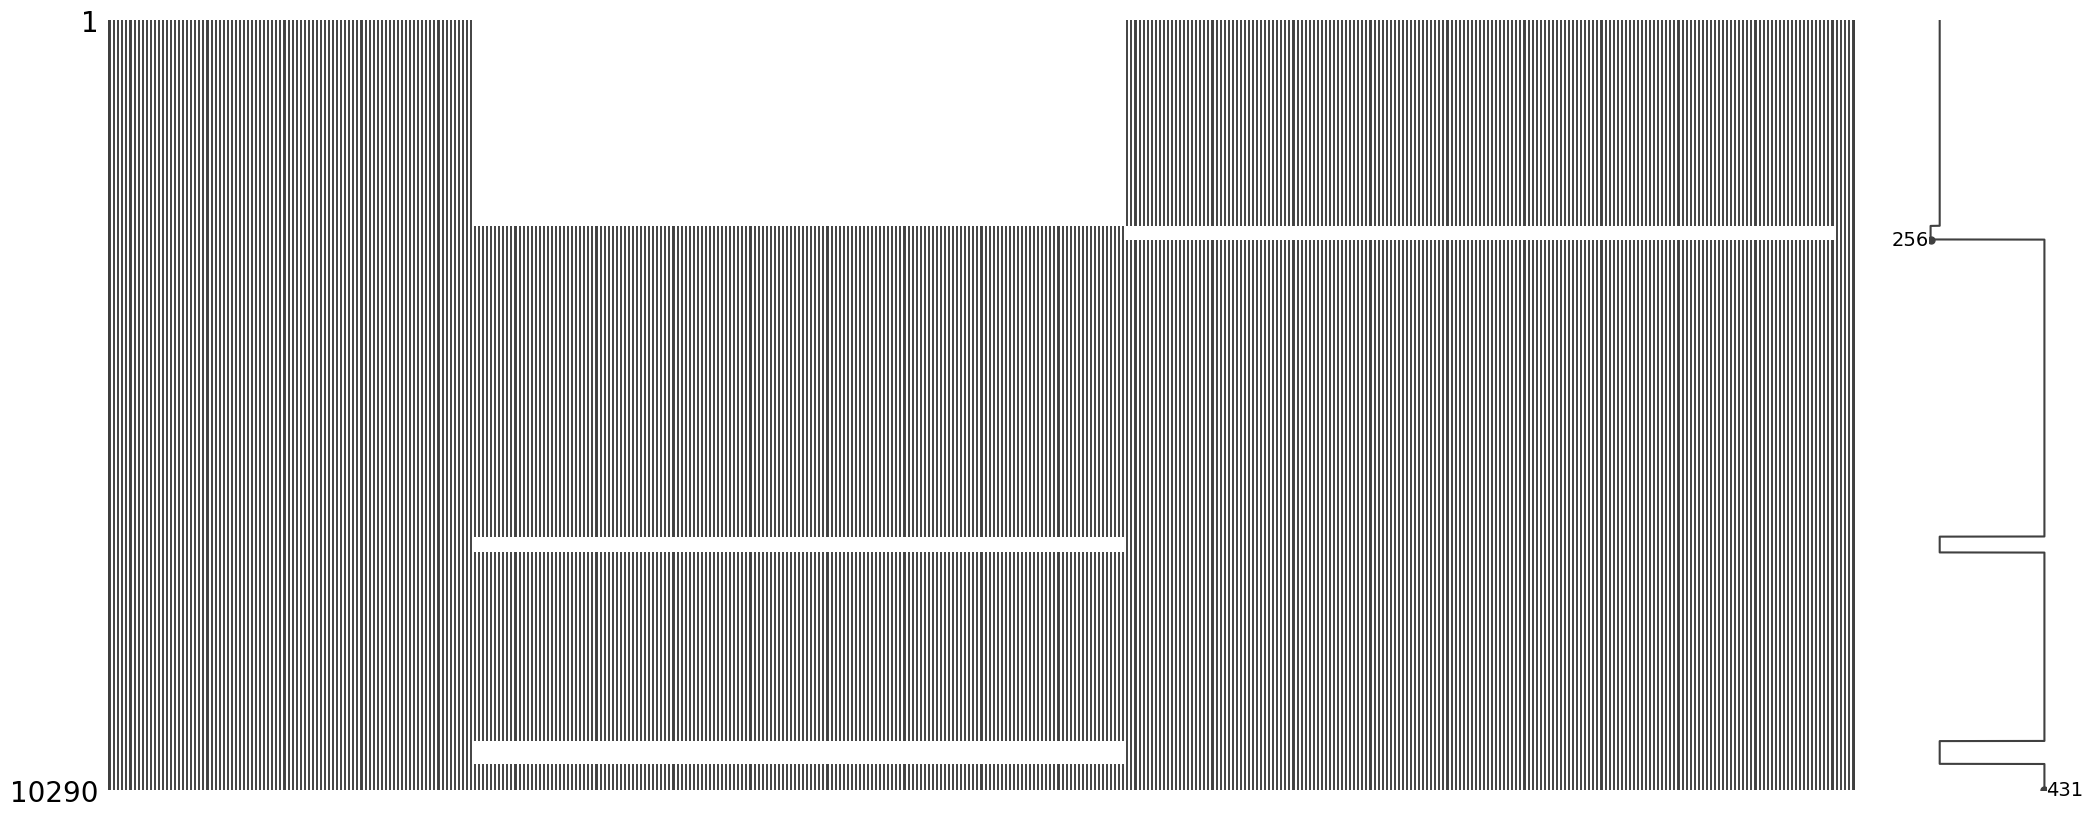

In [7]:
# Visualize missing data
import missingno as msno
msno.matrix(df)
plt.show()

We need to keep in mind that: \
LakeTrout: \
LT001 to LT007: F90 - F170 missing  \
LT008: F173 - F260 missing \
LT020: F90 - F170 missing 

Small mouth bass: \
SMB008-SMB010: F90 - F170 missing

### 3.4 Statistical Summary of Target Strength

In [8]:
# Summary statistics of target strength columns
frequency_columns = [col for col in df.columns if col.startswith('F')]
print(df[frequency_columns].describe())

                F45         F45.5           F46         F46.5           F47  \
count  10290.000000  10290.000000  10290.000000  10290.000000  10290.000000   
mean     -52.918267    -52.658873    -52.444609    -52.043469    -51.999620   
std        7.922596      7.878262      7.841351      7.902786      7.981471   
min      -87.143338    -89.135784    -95.094212    -98.980445    -93.384566   
25%      -57.787850    -57.396709    -57.262032    -56.908159    -56.931189   
50%      -54.199481    -53.946482    -53.673536    -53.188904    -53.019761   
75%      -48.442195    -48.201614    -48.048698    -47.561611    -47.407454   
max      -29.636408    -29.368150    -29.280024    -28.888424    -28.565472   

              F47.5           F48         F48.5           F49         F49.5  \
count  10290.000000  10290.000000  10290.000000  10290.000000  10290.000000   
mean     -51.806922    -51.752644    -51.632206    -51.403784    -51.167510   
std        7.977894      8.005973      8.006547    

With 462 frequency features, it is not very efficient to list the statistical summary for each frequency column. Instead of analyzing each frequency separately, I will compute the mean target strength across all frequencies for each species.

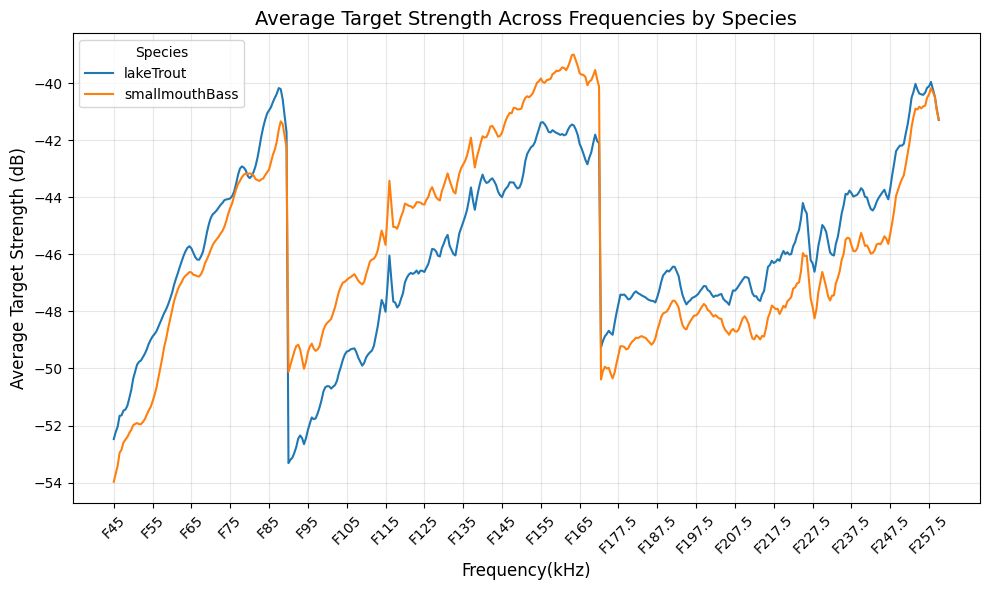

In [9]:
species_column = 'species'

df[frequency_columns] = df[frequency_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average target strength for each frequency per species
average_by_species = df.groupby(species_column)[frequency_columns].mean().transpose()

# Plot the data
plt.figure(figsize=(10, 6))

for species in average_by_species.columns:
    plt.plot(average_by_species.index, average_by_species[species], label=species)

# Add labels and title
plt.xlabel('Frequency(kHz)', fontsize=12)
plt.ylabel('Average Target Strength (dB)', fontsize=12)
plt.title('Average Target Strength Across Frequencies by Species', fontsize=14)
plt.legend(title='Species', fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(average_by_species.index[::20], rotation=45)  # Show every 20th frequency

# Show the plot
plt.tight_layout()
plt.show()

As we can observe, the two lines representing the average target strength for the two species are quite separate with little overlap, it suggests that the two species have distinct frequency responses across the measured frequencies.
We can also observe that there are three main intervals of the target frequencies: low, medium, and high. It is also obvious that the medium frequencies vary the most between the species, so they might be the most discriminative features for classification.

### 3.5 Correlation between Frequencies

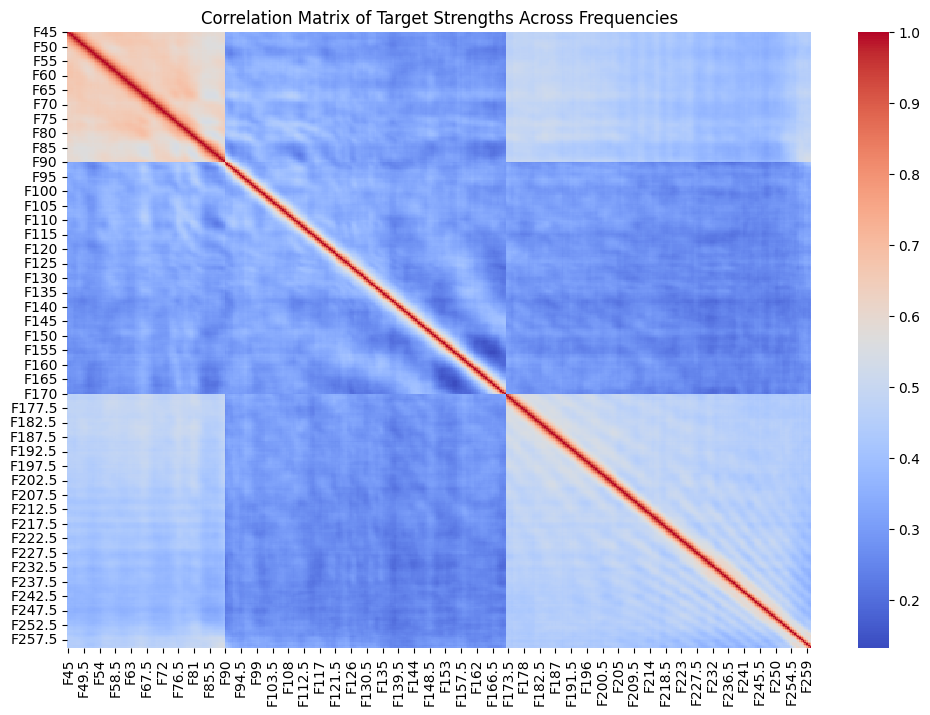

In [10]:
# Compute correlation matrix
corr_matrix = df[frequency_columns].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Target Strengths Across Frequencies")
plt.show()

The correlation matrix heatmap between frequencies further reinforced my findings in the previous section about there seemed to be three intervals in the frequencies. From this heatmap, we can observe that there is strong correlation in low frequencies (F45-F90), low correlation in medium frequencies (F90-F170), and medium correlation in high frequencies (F170 to F275.5).

### 3.6 Temporal Patterns with Ping Time

#### Visualize Target Strength Over Time for an Example Fish

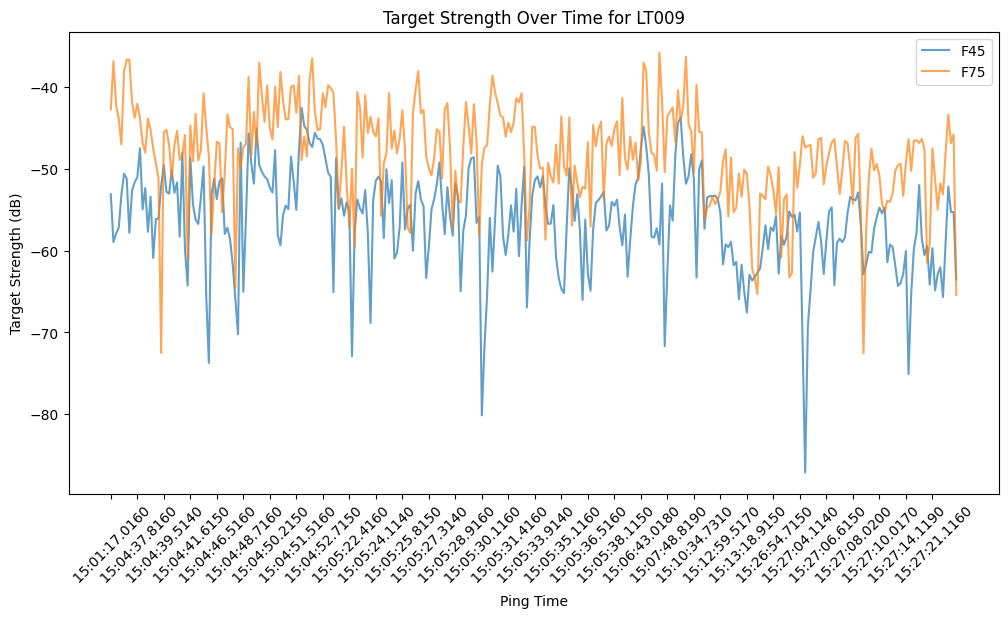

In [11]:
# Select an example fish
example_fish = df[df["fishNum"] == "LT009"]  # Replace with an actual fishNum
# Plot target strength at different frequencies over time
plt.figure(figsize=(12,6))
for freq in ["F45", "F75"]:  # Select key frequencies
    plt.plot(example_fish["Ping_time"], example_fish[freq], label=freq, alpha=0.7)

plt.xlabel("Ping Time")
plt.ylabel("Target Strength (dB)")
plt.title(f"Target Strength Over Time for {example_fish['fishNum'].iloc[0]}")
plt.legend()
plt.xticks(ticks=example_fish["Ping_time"][::10], rotation=45)
plt.show()

We can see the frequencies are quite volatile even for the same fish across pings.

#### Examine the distribution of time difference between pings 

/var/folders/r_/ypjqpbh136gdzxvkn9cvg1wh0000gn/T/ipykernel_40496/204820783.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time_diff"] = df.groupby("fishNum")["pingDateTime"].diff().dt.total_seconds()


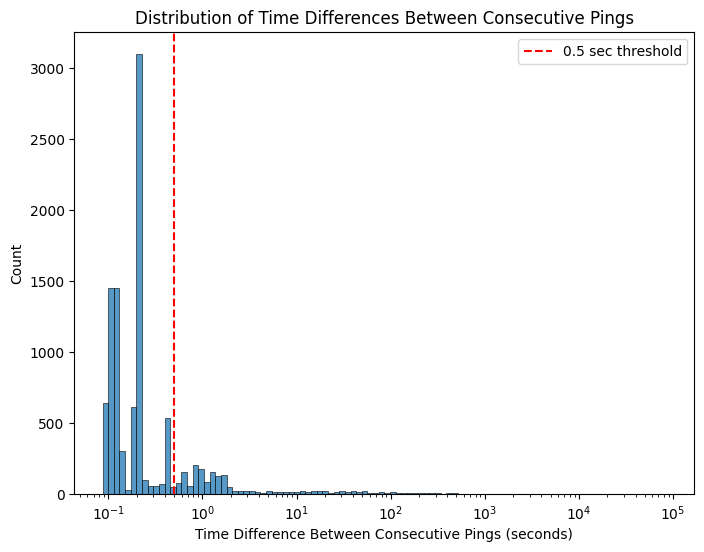

In [12]:
# Convert pingTime to datetime
df["pingDateTime"] = pd.to_datetime(df["pingDateTime"])

# Sort by fishNum and pingTime
df = df.sort_values(by=["fishNum", "pingDateTime"])

# Compute time difference between consecutive pings within the same fish
df["time_diff"] = df.groupby("fishNum")["pingDateTime"].diff().dt.total_seconds()

# Histogram of time differences
plt.figure(figsize=(8,6))
sns.histplot(df["time_diff"].dropna(), bins=100, log_scale = (True, False))
plt.axvline(0.5, color='r', linestyle='--', label="0.5 sec threshold")
plt.xlabel("Time Difference Between Consecutive Pings (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Time Differences Between Consecutive Pings")
plt.legend()
plt.show()

As we can see, most pings within a group are less than 0.5 seconds with the previous pings. Thus, we can create groups where the time difference between consecutive pings within a group is less than 0.5 seconds. After grouping the pings, I can treat each group as a sequence and use it as input to models like LSTM/GRU.

In [13]:
df = df.sort_values(["fishNum", "pingDateTime"])

# Define time threshold
TIME_DELTA_THRESHOLD = pd.Timedelta("500ms")  # 0.5 seconds

# Function to compute sequence lengths per fish
def compute_sequence_lengths(group):
    lengths = []
    current_length = 1
    prev_time = None
    
    for _, row in group.iterrows():
        if prev_time is not None:
            time_diff = row["pingDateTime"] - prev_time
            if time_diff <= TIME_DELTA_THRESHOLD:
                current_length += 1
            else:
                lengths.append(current_length)
                current_length = 1  # Reset for new sequence
        prev_time = row["pingDateTime"]
    
    lengths.append(current_length)  # Add last sequence
    return lengths

# Collect sequence lengths across all fish
all_sequence_lengths = []
for _, fish_group in df.groupby("fishNum"):
    all_sequence_lengths.extend(compute_sequence_lengths(fish_group))

# Convert to pandas Series for analysis
sequence_lengths = pd.Series(all_sequence_lengths)

In [14]:
print("Sequence Length Statistics:")
print(sequence_lengths.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

Sequence Length Statistics:
count    1833.000000
mean        5.613748
std        14.337490
min         1.000000
50%         3.000000
90%        11.000000
95%        17.000000
99%        39.000000
max       366.000000
dtype: float64


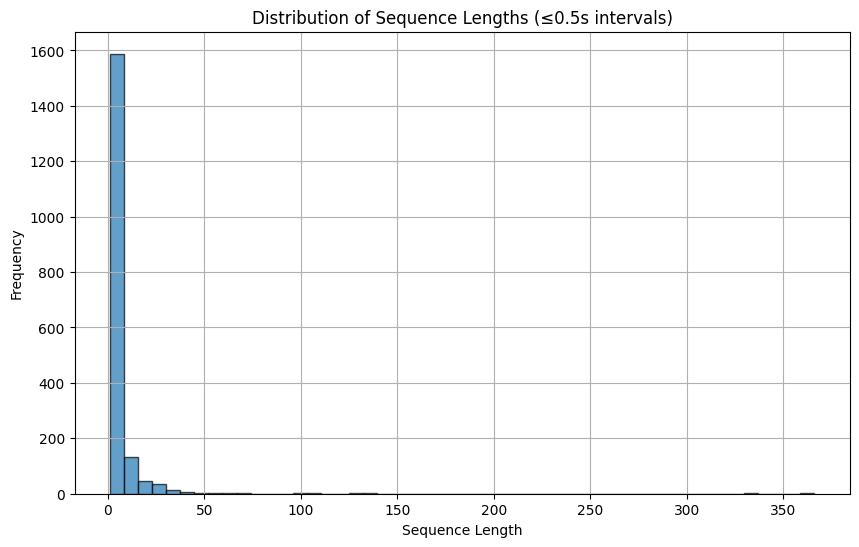

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, edgecolor="k", alpha=0.7)
plt.title("Distribution of Sequence Lengths (≤0.5s intervals)")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
MAX_SEQUENCE_LENGTH = int(sequence_lengths.quantile(0.95))
print(f"Suggested MAX_SEQUENCE_LENGTH: {MAX_SEQUENCE_LENGTH}")

# Check coverage
coverage = (sequence_lengths <= MAX_SEQUENCE_LENGTH).mean()
print(f"Covers {coverage:.1%} of sequences")

Suggested MAX_SEQUENCE_LENGTH: 17
Covers 95.1% of sequences
